앞서 사용했던 캐글 당뇨병 데이터를 전처리하여 basemodel에서 성능을 높이기 위해 데이터 탐색을 진행합니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 불러오기

- Pregnancies: 임신 횟수
- Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure: 이완기 혈압 (mm Hg)
- Skin Thickness: 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin: 2시간 혈청 인슐린 (mu U /ml)
- BMI: 체질량 지수(kg / (m)^2)
- DiabetesPedigreeFunction: 당뇨병 혈통 기능
- Age: 나이
- Outcome: (예측해야할 종속 변수) 768개 중에 268개의 결과 클래스 변수(0또는 1)는 1이고 나머지는 0 입니다.

In [2]:
df=pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 기본적인 데이터 살펴보기

- 데이터 타입
- 결측치 확인
- 수치 데이터 요약

In [3]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 데이터 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# 수치 데이터 요약
# min 0 인 데이터들은 결측치 일 수 있음
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 임신, 당뇨병 여부 제외하고는 0 을 결측치로 변경
df_null=df[df.columns[1:-1]].replace(0, np.nan)
df_null.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

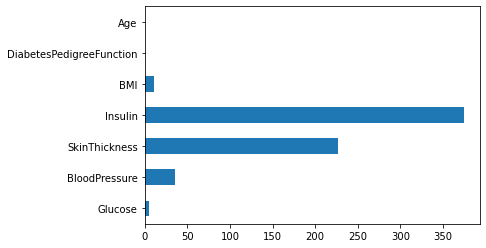

In [7]:
# 결측치의 갯수 시각화
df_null.isnull().sum().plot.barh()

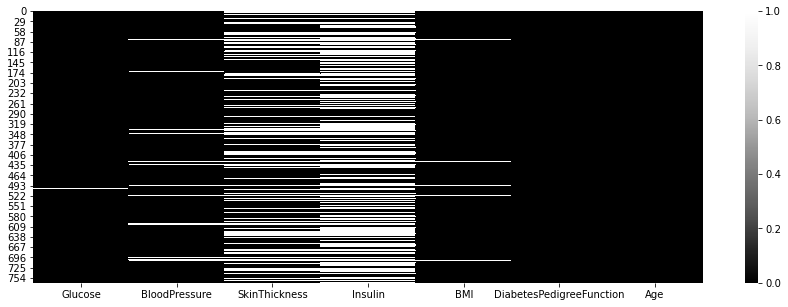

In [8]:
# 결측치 히트맵으로 보기
plt.figure(figsize = (15,5))
sns.heatmap(df_null.isnull(), cmap = 'Greys_r')

## 당뇨병 발병 빈도 (y) 살펴보기

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
# 데이터에서 34% 당뇨병
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

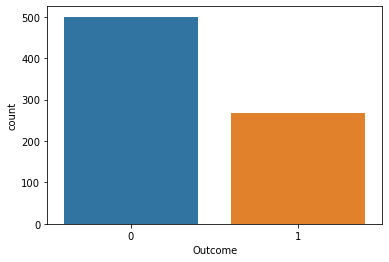

In [11]:
sns.countplot(data=df, x='Outcome')

In [12]:
# 임신 여부에 따른 발병 여부
# 임신 14회 이상일때는 빈도수 작아서 확률이 100% 
df_po=df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count'])
df_po

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


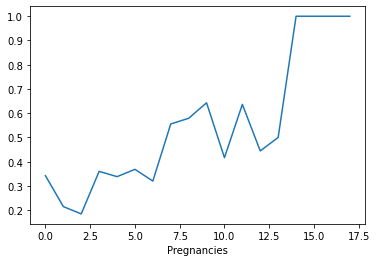

In [13]:
# 임신 횟수에 따른 발병율
df_po['mean'].plot()

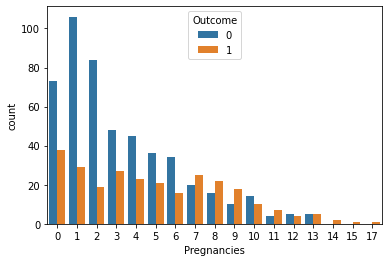

In [14]:
# 임신 횟수에 따른 발병 여부
sns.countplot(data=df, x = 'Pregnancies', hue = 'Outcome')

## 연속 변수 -> 범주형 변수로 바꾸기

In [15]:
# 연속된 값 범주로 나누기 : 임신 14회, 15회 , 17회는 데이터 수가 적어서 오버피팅 될 수 있음 
df['Preg_high'] = df['Pregnancies'] > 6

In [16]:
df[['Pregnancies','Preg_high']]

,Pregnancies,Preg_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


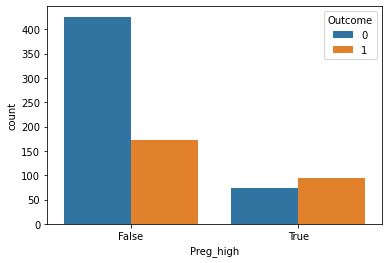

In [17]:
sns.countplot(data=df, x='Preg_high', hue = 'Outcome')

## 시각화

In [18]:
df_0=df[df['Outcome'] == 0]
df_1=df[df['Outcome'] == 1]

### subplot

전체 변수의 분포 살펴보기

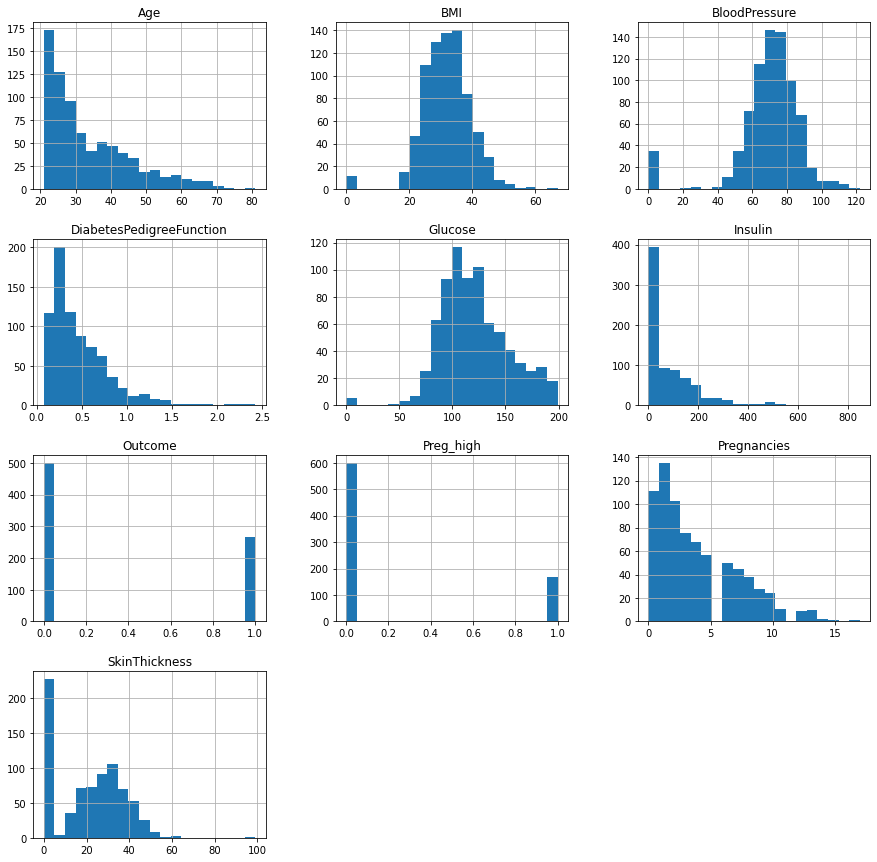

In [19]:
df['Preg_high'] = df['Preg_high'].astype(int)
h = df.hist(bins = 20, figsize = (15,15))


#### distplot

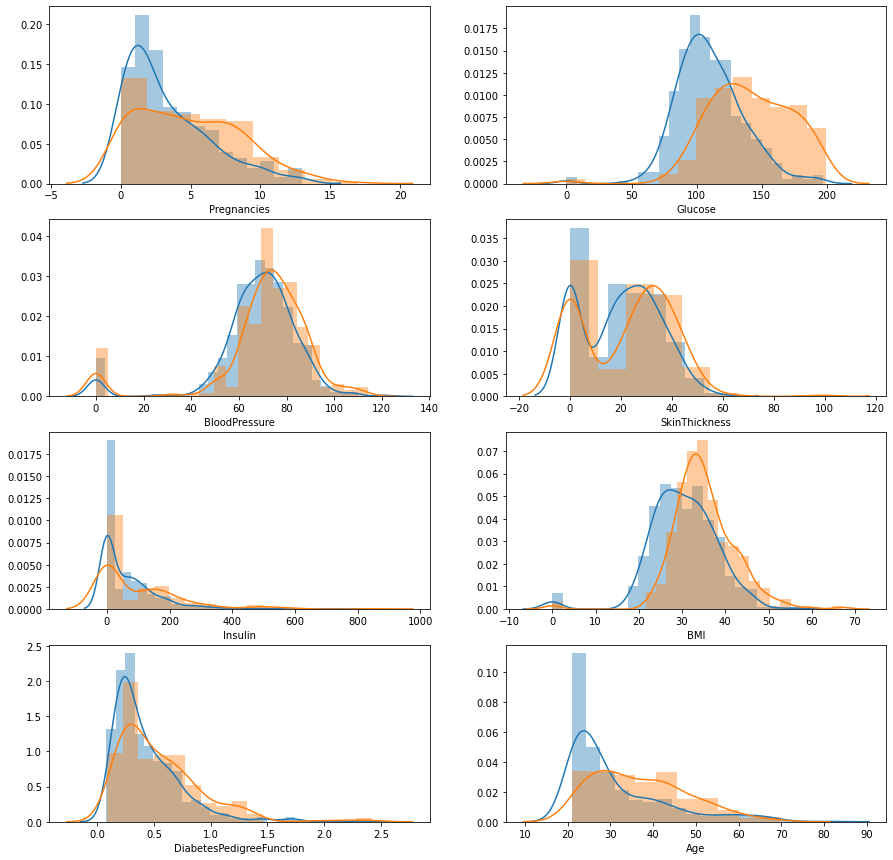

In [20]:
# 발병 여부에 따라서 모든 변수 살펴보기
fig, axes = plt.subplots(nrows = 4, ncols=2, figsize = (15,15))

for i, col_name in enumerate(df.columns[:-2]):
    row = i //2
    col = i % 2
    
    sns.distplot(df_0[col_name], ax= axes[row][col] , label = 0)
    sns.distplot(df_1[col_name], ax= axes[row][col], label=1)

#### volinplot

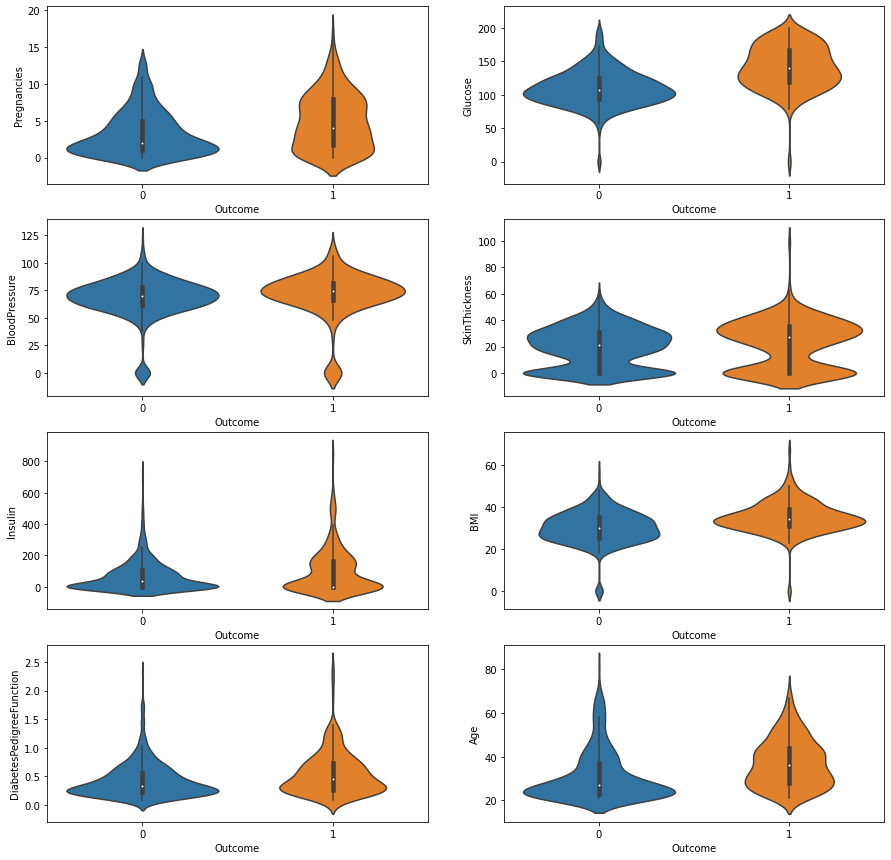

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols=2, figsize = (15,15))

for i, col_name in enumerate(df.columns[:-2]):
    row = i //2
    col = i % 2
    
    sns.violinplot(data=df, x='Outcome', y=col_name, ax=axes[row][col])

#### lmplot
- 상관계수가 높은 두 변수에 대해 시각화

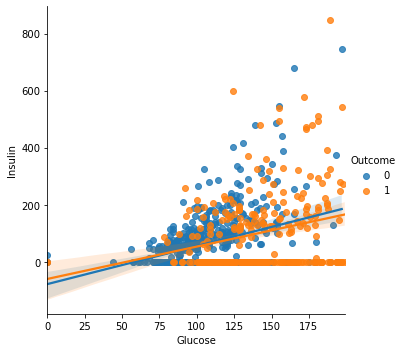

In [22]:
# Glucose, Insulin 을 outcome으로 구분
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

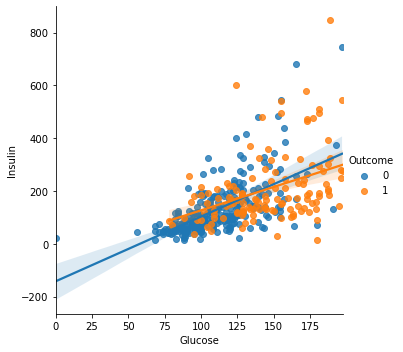

In [23]:
# Glucose, Insulin 을 outcome으로 구분
# 당뇨 발병한 사람은 글루코스가 증가함에 따라 인슐린이 적음
sns.lmplot(data=df[df['Insulin'] > 0], x='Glucose', y='Insulin', hue='Outcome')

## 상관 분석
- 피처엔지니어링을 위해 상관 관계 분석

### 전처리 X

In [34]:
df_corr=df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Preg_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Preg_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


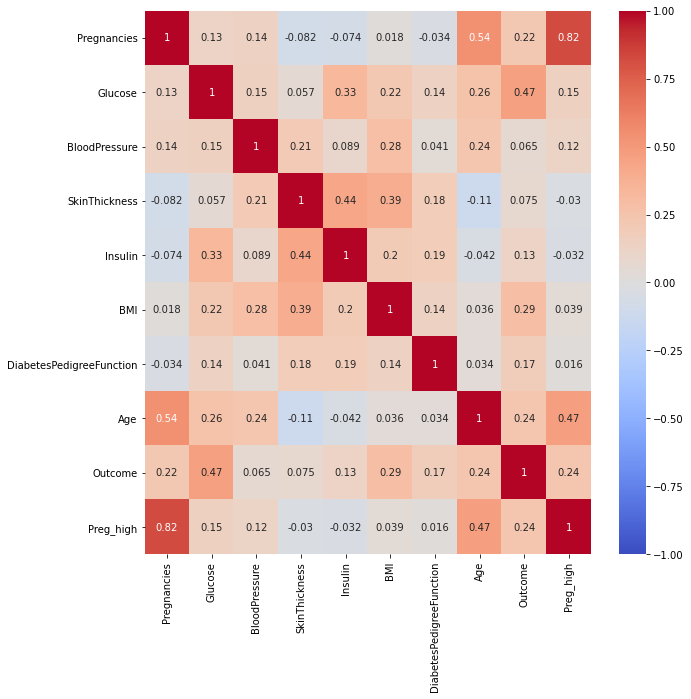

In [33]:
plt.figure(figsize= (10,10))
sns.heatmap(df_corr, cmap = 'coolwarm', vmax = 1, vmin=-1, annot=True)

### 전처리 O

In [44]:
# 임신 여부, 당뇨병 여부 제외하고 0 -> np.nan 으로 변경
df_matrix=df.iloc[:,1:-2].replace(0,np.nan)
df_matrix['Pregnancies'] = df['Pregnancies']
df_matrix['Outcome'] = df['Outcome']

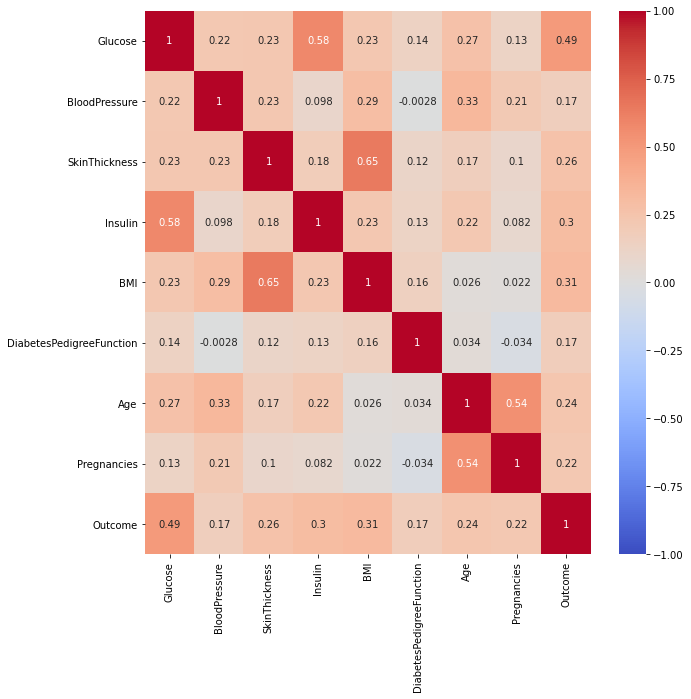

In [47]:
df_m_corr=df_matrix.corr()
plt.figure(figsize= (10,10))
sns.heatmap(df_m_corr, cmap = 'coolwarm', vmax = 1, vmin=-1, annot=Trdue)

In [51]:
# 전처리 후 상관 관계
# Glucose 0.03 증가
# BloodPressure 0.11 증가
# SkinThickness 0.18 증가
# Insulin 0.17 증가
# BMI 0.02증가

df_m_corr['Outcome']

Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Pregnancies                 0.221898
Outcome                     1.000000
Name: Outcome, dtype: float64

In [50]:
# 전처리 전 상관 관계
df_corr['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Preg_high                   0.237557
Name: Outcome, dtype: float64